In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/df_cleaned.csv")

In [ ]:
df.head()

,carbon-footprint_100g,category_encoded,packaging_encoded,origins_encoded,countries_encoded
0,0.000000,8,2,12,4
1,0.000001,7,1,9,2
2,82.800000,1,5,22,6
3,56.200000,1,3,22,6
4,82.600000,1,5,22,6


<Axes: xlabel='carbon-footprint_100g', ylabel='category_encoded'>

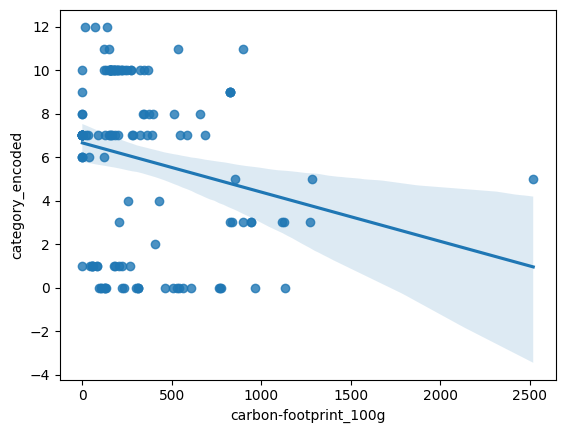

In [ ]:
sns.regplot(x=df['carbon-footprint_100g'],y=df['category_encoded'])

<Axes: xlabel='carbon-footprint_100g', ylabel='countries_encoded'>

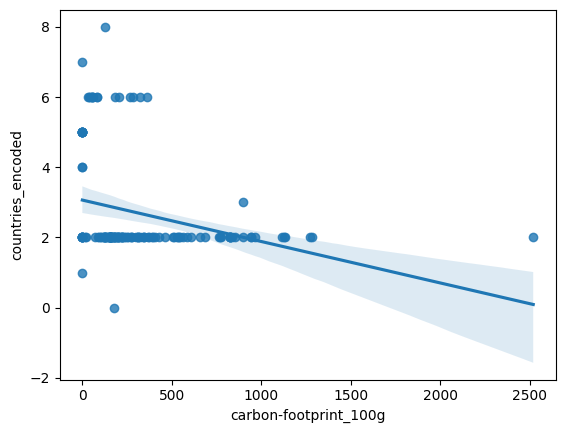

In [ ]:
sns.regplot(x=df['carbon-footprint_100g'],y=df['countries_encoded'])

<Axes: xlabel='carbon-footprint_100g', ylabel='origins_encoded'>

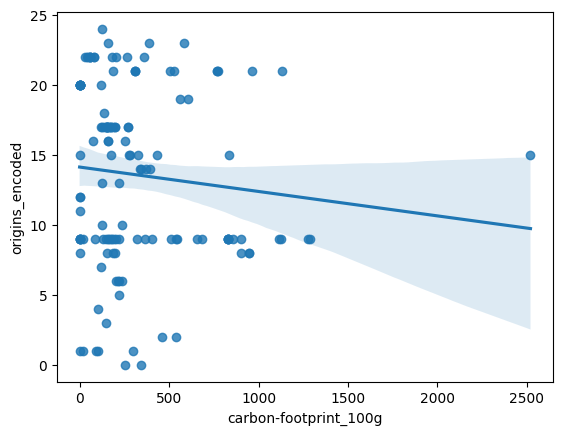

In [ ]:
sns.regplot(x=df['carbon-footprint_100g'],y=df['origins_encoded'])

<Axes: xlabel='carbon-footprint_100g'>

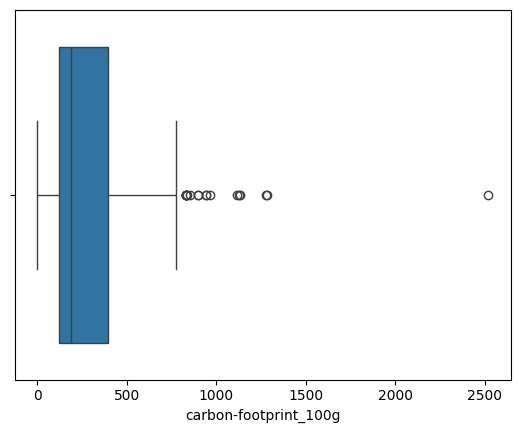

In [ ]:
sns.boxplot(x=df['carbon-footprint_100g'])

<Axes: xlabel='countries_encoded'>

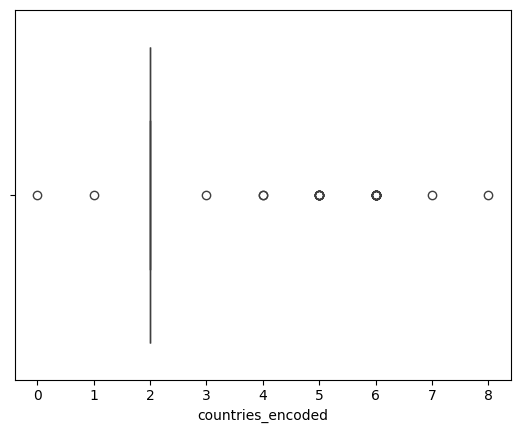

In [ ]:
sns.boxplot(x=df['countries_encoded'])

<Axes: xlabel='origins_encoded'>

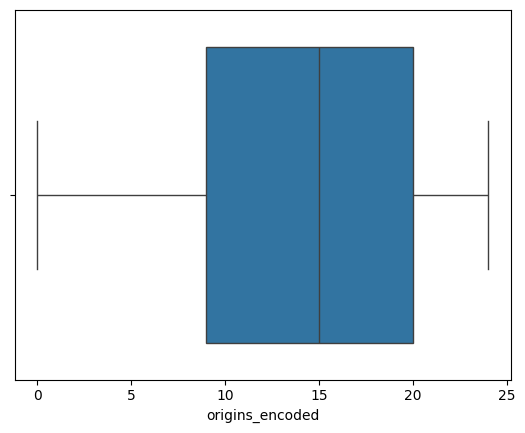

In [ ]:
sns.boxplot(x=df['origins_encoded'])

<Axes: xlabel='category_encoded'>

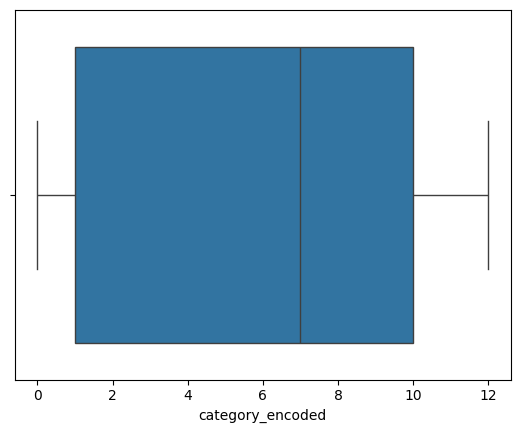

In [ ]:
sns.boxplot(x=df['category_encoded'])

In [ ]:
def cap_outliers_iqr(data, factor=1.5):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1

    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR

    # Cap values instead of removing them
    capped_data = np.clip(data, lower_bound, upper_bound)

    outliers_count = np.sum((data < lower_bound) | (data > upper_bound))
    print(f"Outliers detected: {outliers_count}")
    print(f"Capping range: [{lower_bound:.2f}, {upper_bound:.2f}]")

    return capped_data, lower_bound, upper_bound

carbon_capped, lower, upper = cap_outliers_iqr(df['carbon-footprint_100g'])

Outliers detected: 18
Capping range: [-292.50, 807.50]


<Axes: xlabel='carbon-footprint_100g'>

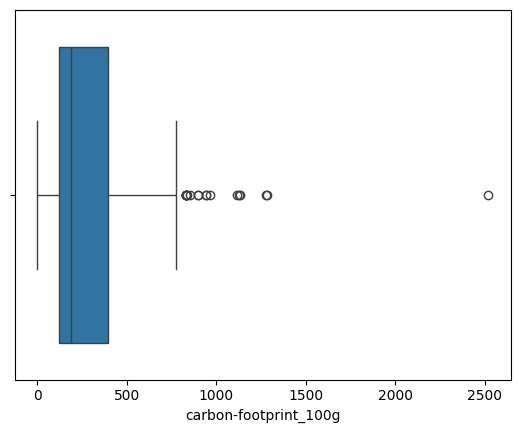

In [ ]:
sns.boxplot(x=df['carbon-footprint_100g'])

In [ ]:
'''def categorize_cf(value):
    if 0 <= value < 50:
        return 'Very Low'
    elif 50 <= value < 200:
        return 'Low'
    elif 200 <= value < 500:
        return 'Medium'
    elif 500 <= value < 1000:
        return 'High'
    else:
        return 'Very High'

df['Carbon_Footprint'] = df['carbon-footprint_100g'].apply(categorize_cf)'''

"def categorize_cf(value):\n    if 0 <= value < 50:\n        return 'Very Low'\n    elif 50 <= value < 200:\n        return 'Low'\n    elif 200 <= value < 500:\n        return 'Medium'\n    elif 500 <= value < 1000:\n        return 'High'\n    else:\n        return 'Very High'\n\ndf['Carbon_Footprint'] = df['carbon-footprint_100g'].apply(categorize_cf)"

In [ ]:
df.head(10)

,carbon-footprint_100g,category_encoded,packaging_encoded,origins_encoded,countries_encoded
0,0.000000,8,2,12,4
1,0.000001,7,1,9,2
2,82.800000,1,5,22,6
3,56.200000,1,3,22,6
4,82.600000,1,5,22,6
5,0.000000,9,5,11,2
6,130.000000,0,4,9,2
7,365.000000,10,0,9,2
8,255.000000,4,0,0,2
9,2520.000000,5,5,15,2


In [ ]:
#df.drop('carbon-footprint_100g',axis=1,inplace=True)

In [ ]:
'''custom_mapping = {
    'Very Low': 0,
    'Low': 1,
    'Medium': 2,
    'High': 3,
    'Very High': 4
}
df['Carbon_Footprint']=df['Carbon_Footprint'].map(custom_mapping)'''

"custom_mapping = {\n    'Very Low': 0,\n    'Low': 1,\n    'Medium': 2,\n    'High': 3,\n    'Very High': 4\n}\ndf['Carbon_Footprint']=df['Carbon_Footprint'].map(custom_mapping)"

In [ ]:
def categorize_cf(value):
    if 0 <= value < 150:
        return 'Low'
    elif 150 <= value < 600:
        return 'Medium'
    else:
      return 'High'

df['Carbon_Footprint'] = df['carbon-footprint_100g'].apply(categorize_cf)
mapping = {'Low': 0, 'Medium': 1, 'High': 2}
df['Carbon_Footprint'] = df['Carbon_Footprint'].map(mapping)

In [ ]:
df.head(20)

,carbon-footprint_100g,category_encoded,packaging_encoded,origins_encoded,countries_encoded,Carbon_Footprint
0,0.000000,8,2,12,4,0
1,0.000001,7,1,9,2,0
2,82.800000,1,5,22,6,0
3,56.200000,1,3,22,6,0
4,82.600000,1,5,22,6,0
5,0.000000,9,5,11,2,0
6,130.000000,0,4,9,2,0
7,365.000000,10,0,9,2,1
8,255.000000,4,0,0,2,1
9,2520.000000,5,5,15,2,2


<Axes: xlabel='Carbon_Footprint'>

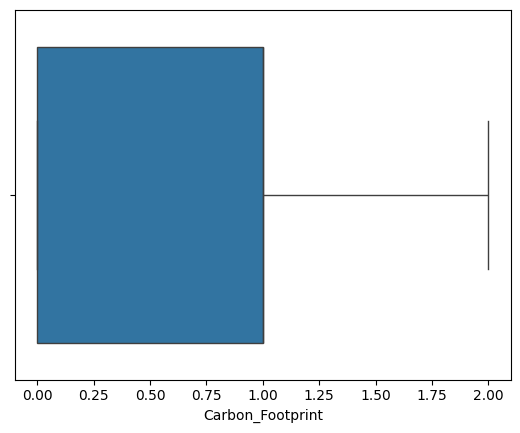

In [ ]:
sns.boxplot(x=df['Carbon_Footprint'])

<Axes: xlabel='Carbon_Footprint', ylabel='Count'>

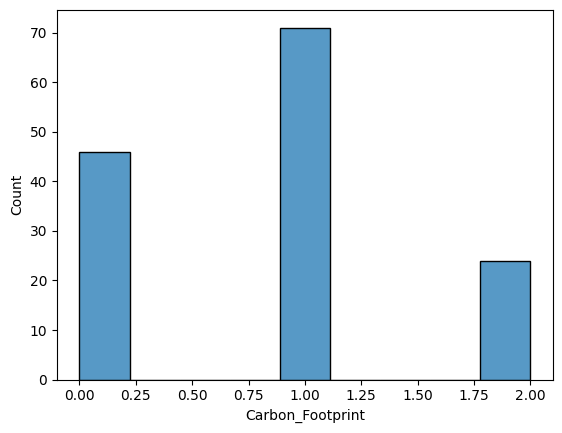

In [ ]:
sns.histplot(x=df['Carbon_Footprint'])

In [ ]:
df.drop('carbon-footprint_100g',axis=1,inplace=True)

In [ ]:
# Separating data and label
x=df.drop(columns='Carbon_Footprint',axis=1)
y=df['Carbon_Footprint']
print(x)
print(y)

     category_encoded  packaging_encoded  origins_encoded  countries_encoded
0                   8                  2               12                  4
1                   7                  1                9                  2
2                   1                  5               22                  6
3                   1                  3               22                  6
4                   1                  5               22                  6
..                ...                ...              ...                ...
136                 7                  1               20                  5
137                 7                  1               20                  5
138                 7                  1               20                  5
139                 7                  4               20                  5
140                 7                  1               20                  5

[141 rows x 4 columns]
0      0
1      0
2      0
3      0
4      0
      .

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)
print(x.shape,xtrain.shape,xtest.shape)

(141, 4) (112, 4) (29, 4)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
model=DecisionTreeClassifier()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
accuracy=accuracy_score(ytest,ypred)
print("Decision Tree test accuracy")
print(accuracy)
cm = confusion_matrix(ytest, ypred)
print("\nConfusion Matrix:")
print(cm)


Decision Tree test accuracy
0.7586206896551724

Confusion Matrix:
[[8 0 0]
 [5 9 1]
 [0 1 5]]


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(ytest, ypred, target_names=['Low', 'Medium', 'High']))


              precision    recall  f1-score   support

         Low       0.62      1.00      0.76         8
      Medium       0.90      0.60      0.72        15
        High       0.83      0.83      0.83         6

    accuracy                           0.76        29
   macro avg       0.78      0.81      0.77        29
weighted avg       0.81      0.76      0.76        29



In [ ]:
y.value_counts()

,count
Carbon_Footprint,
1,71
0,46
2,24


In [ ]:
import joblib
joblib.dump(model,"carbon-footprint_model.pkl")

['carbon-footprint_model.pkl']